# Бустинговые алгоритмы

## Суть бустинговых алгоритмов

История бустинга началась с вопроса о том, можно ли из большого количества относительно слабых и простых моделей получить одну сильную (Кернс и Вэлиант, 1988-1989 гг.). Под слабыми моделями мы подразумеваем не только небольшие и "слабые" модели вроде деревьев решений в противовес более "сильным" моделям, например, случайному лесу. В нашем случае слабыми моделями могут быть и произвольные алгоритмы машинного обучения, точность которых может быть лишь немногим выше случайного угадывания.

Утвердительный математический ответ на этот вопрос нашелся довольно быстро, что само по себе было важным теоретическим результатом для машинного обучения и статистики (статья Роберта Шапире, 1990 год). Однако, потребовалось несколько лет до появления первых работоспособных алгоритмов. Их общий подход заключался в построении линейной комбинации простых моделей (базовых алгоритмов) путем перевзвешивания входных данных. *Каждая последующая модель строилась таким образом, чтобы придавать больший вес и предпочтение ранее некорректно предсказанным наблюдениям*.

Таким образом, общий принцип работы бустинговых алгоритмов заключается в следующем: **строим серию не особо точных алгоритмов и обучаем их на ошибках друг друга**.

![title](boosting_01.jpg)

***Гипотеза о бустинге*** — может служить некоторым определением бустинговых алгоритмов. Предположим, мы располагаем *слабым обучением*, то есть у нас есть некоторый алгоритм обучения, выдающий нам гипотезу, эффективность которой лишь слегка лучше случайного гадания. Встает вопрос: вытекает ли из существования данного алгоритма слабого обучения существование эффективного алгоритма, который даёт гипотезу произвольной точности (то есть *сильное обучение*). Алгоритмы, которые получают быстро такую гипотезу, становятся известны как "бустинг".

## Работа бустингового алгоритма на примере дерева решений

Рассмотрим работу бустингового алгоритма на следующем примере. Допустим, у нас есть данные по миллиону музыкальных клипов на Ютубе. По каждому из клипов есть 100 критериев, например:
<br>☆ длится ли клип дольше трёх минут,
<br>☆ есть ли там прямая бочка,
<br>☆ этот трек в жанре «хип-хоп» или нет,
<br>☆ выпустил ли клип популярный лейбл,
<br>☆ записан ли клип во дворе на мобильный телефон,
<br>…
<br>Также у нас есть данные о том, набрал ли клип больше миллиона просмотров. Мы хотим научиться предсказывать этот критерий — для определённости назовём его популярностью. Таким образом, мы хотим получить некий алгоритм, которому на вход подаётся 100 критериев клипа в формате да/нет, а на выходе он говорит: «Этому клипу суждено стать популярным».

![title](boosting_02.jpg)

### Дерево решений

Пусть самая сильная связь с итоговой популярностью у критерия «Выпустил ли клип популярный лейбл», а критерий «Длится ли клип дольше трёх минут» лучше других предсказывает популярность клипов популярного лейбла. Тогда они ставятся в вершины соответствующих веток:

![title](boosting_03.jpg)

В ходе дальнейшего анализа получим итоговое дерево решений:

![title](boosting_04.jpg)

### Случайный лес

Возьмём случайную выборку из наших исходных данных, например, 10 000 клипов, и применим к ним случайный набор критериев, например, какие-нибудь 5:

![title](boosting_05.jpg)

И построим на каждой такой выборке более простые деревья — получим модель случайного леса. Теперь запустим клип, которого не было в обучающей выборке. Каждое дерево выдаст свой вердикт, станет ли он популярным — «да» или «нет». Три за, один против — клип ждёт успех. Наверное.

![title](boosting_06.jpg)

### Неслучайный лес — бустинг

Теперь построим похожий лес, но набор данных будет неслучайным. Первое дерево мы построим так же, как и раньше, на случайных данных и случайных критериях. А потом прогоним через это дерево контрольную выборку: другие клипы, по которым у нас есть все данные, но которые не участвуют в обучении. Посмотрим, где дерево ошиблось (первое дерево может давать много ошибок).
Теперь создадим следующее дерево. Наша задача — сделать дерево, которое исправит ошибки предыдущего, для этого мы учим дерево исправлять ошибки предшественника:

![title](boosting_07.jpg)

Новое дерево наделает своих ошибок. Делаем третье, которое их исправит. Потом четвёртое. И так далее. Создаём такие деревья, пока не достигнем желаемой точности или пока точность не начнёт падать из-за переобучения. В итоге получаем много деревьев, каждое из которых не очень сильное. Но вместе они складываются в лес, который даёт хорошую точность. Это и есть Бустинг!

## Алгоритмы бустинга

### Вспомогательная информация

#### Определения и понятия

Бустинг - это класс методов машинного обучения, основанный на идее, что комбинация простых классификаторов (полученных слабым учеником) может работать лучше, чем любой из простых классификаторов. *Слабый ученик* - это алгоритм обучения, способный производить слабые классификаторы с вероятностью ошибки строго (но незначительно) меньше случайного угадывания (0.5, в двоичном случае). С другой стороны, *сильный ученик* способен (учитывая достаточное количество обучающих данных) давать сильные классификаторы с произвольно малой вероятностью ошибки.
<br>Ансамбль классификаторов - это классификатор, построенный на некой комбинации слабых учеников. Стратегия бустинга состоит в том, чтобы обучить много слабых классификаторов и каким-то образом объединить их, вместо того, чтобы пытаться получить один сильный классификатор.

Пусть
<br><center>$H_{m}: \mathfrak{X}\rightarrow\left\{-1,+1\right\}$ - $m$-ый слабый бинарный классификатор (для $m=1,...,M$),</center>
<br><center>$x \in \mathfrak{X}$ - некоторый входной шаблон для классификации.</center>
<br>Существует много способов объединить полученную совокупность $\left\{H_{m}\right\}_{m=1}^M$ в единый прогноз класса. Например, если мы предположим, что классификаторы ошибаются независимо друг от друга, то комбинация большинства голосов должна давать более низкую вероятность ошибки, чем любой из отдельных классификаторов. Тогда, если взять взвешенную линейную комбинацию выходов слабых классификаторов, то функция прогнозирования ансамбля $H:\mathfrak{X}→\left\{−1,+1\right\}$ задается следующим образом:

$$H\left(x\right)=\textrm{sign}\left(\sum_{m=1}^M\alpha_{m}H_{m}\left(x\right)\right)$$

где $\alpha_{1}, \alpha_{2}, \alpha_{M}$ - набор весов (использование простого большинства голосов получается, если все веса равны между собой).

По сути, бустинг состоит в многократном использовании слабых алгоритмов обучения на разно взвешенных версиях обучающих данных. Вес каждого метода на каждом раунде алгоритма зависит от точности предыдущих классификаторов, что позволяет алгоритму сосредоточить своё внимание на те примеры, которые все ещё неправильно классифицированы.

![title](boosting_08.jpg)

#### Пример: бустинг линейной регрессии

В качестве иллюстрации - простой пример бустингового алгоритма линейной регрессии для множества $(x_i,y_i)$, $i=1,...,N$

Алгоритм имеет следующий вид:
1. Инициализация весов $\omega^{(1)}_i=\frac{1}{N},i\in\{1,...,N\}$ и $m=1$.
2. Пока $m\leq M$, выполняем следующий цикл:
<br>    ◉ Используя веса $\omega_i^{(1)}$, методом наименьших квадратов построим линейную регрессию и найдем приближенные значения $\tilde{y}_i^{(m)}=a^{(m)}+b^{(m)}x_i$.
<br>    ◉ Для каждого $i = 1, ..., N$ обновим вес $\nu^{(m)}_i=(y_i-\tilde{y}_i^{(m)})$.
<br>    ◉ Перенормируем веса, для чего вычислим $S_m=\sum_{j=1}^N\nu^{(m)}_j$ и для $i = 1, ..., N$  $     \omega^{(m+1)}_i=\frac{\nu^{(m)}_i}{S_m}$.
<br>    ◉ Увеличим счетчик итераций: $m = m + 1$.
3. Заканчиваем цикл и в результате получаем прогноз:
$$Y_i=\frac{\sum_{m=1}^M\omega_i^{(m)}(x_i)\tilde{y}^{(m)}_i}{\sum_{m=1}^M\omega_i^{(m)}}.$$

### Классический алгоритм Шапире

**Ввод.** Исходные данные: выборка размером $N$: $Z = \{z_1, z_2, ..., z_N\}$, где $z_i = (x_i, y_i)$, $x_i\in \mathfrak{X}$ и $y_i\in \{-1,+1\}$.
<br>**Вывод.** Классификатор $H:\mathfrak{X}\to \{-1,+1\}$.

Алгоритм имеет следующие пункты:
<br>*✔️* Произвольно выбрать без замены $L_1 \lt N$ выборок из $Z$ и получить $Z^*_1$.
<br>*✔️* Используя слабого ученика для $Z^*_1$, получим классификатор $H_1$.
<br>*✔️* Выберем $L_2 \lt N$ выборок из $Z$, причем половиной выборок будут данные, неправильно классифицированные по $H_1$, чтобы получить $Z^*_2$.
<br>*✔️* Используя слабого ученика из $Z^*_2$, получим классификатор $H_2$.
<br>*✔️* Выберем все образцы из $Z$, на которых $H_1$ и $H_2$ не совпадают, получая $Z^*_3$.
<br>*✔️* Используя слабого ученика на $Z^*_3$, получим классификатор $H_3$.
<br>*✔️* И, наконец, получим окончательный классификатор большинством голосов: $H(x)=\textrm{sign} \left(\sum_{b=1}^3H_b(x)\right)$.

![title](boosting_09.jpg)

Как видно из алгоритма Шапире, обучающий набор случайным образом делится без замены на три множества, $Z^*_1$, $Z^*_2$ и $Z^*_3$. Если при определении принадлежности элемента первые два классификатора ($H_1$ и $H_2$) согласны с меткой класса, то для данного элемента это решение является окончательным. Множество примеров, по которым они не согласны, определяет множество $Z^*_3$, которое и используется для обучения $H_3$. Шапире показал, что этот метод обучения позволяет построить сильный классификатор. В дальнейшем, опираясь на идеи Шапире, Фрейнд предложил новый алгоритм, который значительно эффективней первоначального.

### Алгоритм AdaBoost (для бинарной классификации)

После того, как каждый из авторов (Фрейнд и Шапире) предложил свою идею усиления ансамблей алгоритмов классификации (бустинг), в 1996 году появилась их совместная работа, посвященная адапивному алгоритму бустинга, так наываемому **AdaBoost**. Ключевая идея AdaBoost состоит в использовании ***взвешенных версий тех же данных вместо их случайных подвыборок***. При этом один и тот же обучающий (тренировочный) набор используется большое число раз. AdaBoost является алгоритмом адаптивного бустинга в том смысле, что каждый следующий классификатор строится по объектам, которые плохо классифицируются предыдущими классификаторами.
<br><br>AdaBoost вызывает слабый классификатор в цикле. После каждого вызова обновляется распределение весов, которые отвечают важности каждого из объектов обучающего множества для классификации. На каждой итерации веса каждого неверно классифицированного объекта возрастают, таким образом новый классификатор «фокусирует своё внимание» на этих объектах.

**Ввод.** Исходные данные: выборка размером $N$: $Z = \{z_1, z_2, ..., z_N\}$, где $z_i = (x_i, y_i)$, $x_i\in \mathfrak{X}$ и $y_i\in \{-1,+1\}$, $М$ - максимальное количество классификаторов.
<br>**Вывод.** Классификатор $H:\mathfrak{X}\to \{-1,+1\}$.

Алгоритм имеет следующий вид:
1. Инициализация весов $\omega^{(1)}_i=\frac{1}{N},i\in\{1,...,N\}$ и $m=1$.
2. Пока $m\leq M$, выполняем следующий цикл:
<br>    ◉ Применяя слабый классификатор к множеству $Z$ и используя веса $\omega^{(m)}_i$, получем классификатор $H_m:\mathfrak{X}\to \{-1,+1\}$.
<br>    ◉ Вычислим взвешенную ошибку данного классификатора: $\varepsilon_m =\sum_{i=1}^N\omega^{(m)}_ih(-y_iH_m(x_i))$.
<br>*Примечание:* Функция $h: R \to \{0, 1\}$ назывется ступенькой Хевисайда и определяется следующим образом:
<br><br>$$h(x)=\left\{
  \begin{array}{ll}
    1, & \hbox{ если }x\ge 0 \\
    0, & \hbox{ если }x\lt 0.
  \end{array}
\right.$$
<br>Следовательно, так как и $y_i$, и $H_m(x_i)$ принимают значения из {−1, + 1}, имеем $h (−y_i H_m (x_i)) = 1$, если $y_i\ne H_m(x_i)$, и $h (−y_i H_m (x_i)) = 0$ в случае $y_i= H_m(x_i)$. Соответственно, $\varepsilon_m$ представляет собой взвешенную ошибку $m$-го классификатора.
<br>    ◉ Найдем вес слабого классификатора $\alpha_m=\frac{1}{2}\ln\frac{1-\varepsilon_m}{\varepsilon_m}$. Вес положителен для любого классификатора с точностью выше 50%. Чем больше вес, тем точнее классификатор. Вес становится отрицательным, когда точность падает ниже 50%. Предсказания можно объединять, инвертируя знак. Таким образом, классификатор с точностью в 40% можно преобразовать в классификатор с точностью в 60%. Так он будет вносить вклад в итоговое предсказание, даже если он работал хуже, чем случайное угадывание. Однако окончательный результат никак не изменится под влиянием классификатора, точность которого равна 50%.
<br>    ◉ Для каждого $i = 1, ..., N$ обновим вес $\nu^{(m)}_i=\omega^{(m)}_i\exp\left(-\alpha_my_iH_m(x_i)\right)$. Экспонента в числителе всегда будет больше 1 в случае неверной классификации из классификатора с положительным весом. После итерации вес неверно классифицированных объектов возрастет. Классификаторы с отрицательным весом поведут себя аналогичным образом. Здесь есть разница в инверсии знака: правильная классификация станет неправильной. Окончательный прогноз можно рассчитать путем учета вклада каждого классификатора и вычисления суммы их взвешенных прогнозов.
<br>    ◉ Перенормируем веса, для чего вычислим $S_m=\sum_{j=1}^N\nu^{(m)}_j$ и для $i = 1, ..., N, \omega^{(m+1)}_i=\frac{\nu^{(m)}_i}{S_m}$.
<br>    ◉ Увеличим счетчик итераций: $m = m + 1$.
3. Заканчиваем цикл и получаем результирующий классификатор: $H(x)=\mathrm{sign}\left(\sum_{j=1}^M\alpha_jH_j(x)\right)$.

Как происходит выбор базового алгоритма классификатора? Чтобы понять это, рассмотрим стандартный функционал качества алгоритма классификации, который и определяет взвешенную ошибку произвольного классификатора $H^*_m$: $Q\left(H^*_m, \omega^{(m)}_1, ..., \omega^{(m)}_N\right)=\sum_{i=1}^N\omega^{(m)}_ih(-y_iH_m^*(x_i))$. Так вот, очередной классификатор $H_m$ определяется из условия минимизации взвешенной ошибки классификации: $$H_m=\DeclareMathOperator*\argmin{arg\,min}\argmin_{H^*_m}Q\left(H^*_m, \omega^{(m)}_1, ..., \omega^{(m)}_N\right).$$При этом при вычислении взвешенной ошибки уже учтены новые веса, которые участвуют в поиске нового классификатора, и именно данные с большими весами и составляют существенную часть взвешенной ошибки, которая минимизируется при поиске классификатора.

По сути, AdaBoost является жадным алгоритмом, который создает сильный классификатор путем оптимизации весов и добавления одного слабого классификатора за раз.

#### Иллюстрация работы алгоритма

![title](boosting_10.jpg)

**Шаг 1.** На первом шаге присваиваем равные веса каждой точке данных и применяем линейный классификатор с целью разделения точек на множества точек с "плюсами" и, соответственно, с "минусами". Первый классфикатор (h1) сгенерировал вертикальную линию с левой стороны, разделяя точки данных. Как видим, эта вертикальная линия неправильно предсказала три значения "+" (плюс). В таком случае назначим более высокие веса этим трем точкам "+" (плюс) и применим другой классификатор. На приведенной иллюстрации это соотносится с размером соответствующей точки, то есть, размер трех неправильно предсказанных точек "+" (плюс) больше по сравнению с остальными точками данных.

**Шаг 2.** Второй классификатор (h2) попытается предсказать эти крупные точки правильно. Теперь вертикальная линия (h2) с правой стороны поля правильно классифицировала три до этого неправильно классифицированных точки "+" (плюс). Но опять же, это вызвало ошибки полученной классификации. На этот раз это три точки "-" (минус). Опять же, назначим более высокий вес на эти три точки "-" (минус) и применим еще один классификатор.

**Шаг 3.** Третий классификатор (h3) применяется для правильного прогнозирования этих ошибочно классифицированных наблюдений. На этот раз горизонтальная линия генерируется для классификации "+" (плюс) и "-" (минус) на основе более высокого веса неправильно классифицированных наблюдений.

**Шаг 4.** Теперь, когда процесс разделения классов прошел успешно, остается объединить методы h1, h2 и h3, чтобы сформировать сильный прогноз, имеющий более сложное правило по сравнению с каждым индивидуальным слабым классификатором.

#### Пример использования

##### Считываем данные

In [1]:
import pandas as pd

# Считываем тренировочные данные
train = pd.read_csv("train_1.csv")
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# Считываем тестовые данные
test = pd.read_csv("test_1.csv")
test.head()

,id,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,28315,Male,38.0,0,Yes,Private,Rural,108.68,32.7,never smoked,0
1,15104,Female,26.0,0,Yes,Private,Rural,88.79,24.9,never smoked,0
2,26604,Female,18.0,0,No,Private,Rural,107.82,26.0,never smoked,0
3,27916,Male,18.0,0,No,Private,Urban,97.39,22.8,never smoked,0
4,60249,Male,13.0,0,No,Private,Urban,141.09,24.0,Unknown,0


##### Предварительная обработка данных

**Проверяем типы данных**

In [3]:
train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
features = ['gender', 'ever_married', 'Residence_type', 'smoking_status', 'work_type']
for i in features:
    print(i, train[i].unique())

gender ['Male' 'Female' 'Other']
ever_married ['Yes' 'No']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [5]:
from sklearn.preprocessing import LabelEncoder
train_num = train.copy()
test_num = test.copy()

# категориальные -> числовые
labelencoder = LabelEncoder()
for i in features:
    train_num[i] = labelencoder.fit_transform(train_num[i])
    test_num[i] = labelencoder.fit_transform(test_num[i])
    
train_num.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


**Пропуски в данных**

In [6]:
# Проверим, есть ли пропуски в данных
train_num.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  157
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Заполним пустые значения индекса массы тела медианными значениями в обучающей выборке
median = train_num['bmi'].median()
train_num['bmi'] = train_num['bmi'].fillna(median)
train_num.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.2,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [8]:
test_num.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  44
smoking_status        0
stroke                0
dtype: int64

In [9]:
# Заполним пустые значения индекса массы тела медианными значениями в тестовой выборке
median = test_num['bmi'].median()
test_num['bmi'] = test_num['bmi'].fillna(median)
test_num.head()

,id,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,28315,1,38.0,0,1,2,0,108.68,32.7,2,0
1,15104,0,26.0,0,1,2,0,88.79,24.9,2,0
2,26604,0,18.0,0,0,2,0,107.82,26.0,2,0
3,27916,1,18.0,0,0,2,1,97.39,22.8,2,0
4,60249,1,13.0,0,0,2,1,141.09,24.0,0,0


**Соотношение классов**

In [10]:
# Целевая переменная
train['heart_disease'].value_counts()

0    3200
1     210
Name: heart_disease, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE

# Создадим модель SMOTE, указав кол-во соседей 10
os = SMOTE(random_state=0, k_neighbors=10)

# вектор признаков
X_train_not_os = train_num.drop(['heart_disease'], axis=1) 
# вектор целевой переменной
y_train_not_os = train_num['heart_disease']

column = X_train_not_os.columns

print("До балансировки")
print(X_train_not_os.shape)
print(y_train_not_os.value_counts())

# Применим алгоритм балансировки
X_train_os, y_train_os = os.fit_resample(X_train_not_os, y_train_not_os)
X_train_os = pd.DataFrame(data=X_train_os, columns=column)
y_train_os = pd.DataFrame(data=y_train_os, columns=['heart_disease'])

print('_'*100)
print("После балансировки")
print(X_train_os.shape)
print(y_train_os.value_counts())

До балансировки
(3410, 11)
0    3200
1     210
Name: heart_disease, dtype: int64
____________________________________________________________________________________________________
После балансировки
(6400, 11)
heart_disease
0                3200
1                3200
dtype: int64


#### Гиперпараметры

**base_estimator**: определяет базовый алгоритм, в качестве базового алгоритма по умолчанию выступает DecisionTreeClassifier, который инициализируется с max_depth=1, для классификации и DecisionTreeRegressor, который инициализируется с max_depth=3.
<br>**n_estimators**: определяет количество базовых алгоритмов; по умолчанию - 10, но для улучшения реализации их можно увеличить.
<br>**learning_rate**: коэффициент скорости обучения - параметр, отвечающий за то, насколько изменяются веса.
<br>**max_depth**: максимальная глубина каждой модели.
<br>**n_jobs**: параметр, показывающий, сколько ядер процессора можно использовать для процесса обучения. “-1” значит, что ограничения нет.
<br>**random_state**: делает ответ модели повторимым. Модель всегда будет давать один и тот же ответ на одних и тех же данных и параметрах при совпадении значения этого параметра.
<br>**loss** *{‘linear’, ‘square’, ‘exponential’}*: определяет функцию потерь, используемую при обновлении весов после каждой итерации. Только для задач регрессии. По умолчанию - linear.

##### Строим модель

**Создаём нашу модель**

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_train_os, y_train_os, test_size=0.3, random_state=1)

DTC = DecisionTreeClassifier(random_state=11, max_features="auto", max_depth=12)
ABC = AdaBoostClassifier(base_estimator=DTC)

**Учим модель**

In [13]:
ABC.fit(X_train, y_train)
ABC_predict = ABC.predict(X_test)

print(accuracy_score(y_test, ABC_predict))

C:\Users\Артём\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9255208333333333


**Создаём финальную модель**

In [14]:
ABC_f = AdaBoostClassifier(base_estimator=DTC)
ABC_f.fit(X_train_os, y_train_os)

C:\Users\Артём\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                         max_features='auto',
                                                         random_state=11))

**Предсказываем значения**

In [15]:
y_pred_test = ABC_f.predict(test_num)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Сверяем предсказанные значения с ответом**

In [16]:
answers = pd.read_csv("answers_1.csv")
answers.head()

,heart_disease
0,0
1,0
2,0
3,0
4,0


In [17]:
print(accuracy_score(answers, y_pred_test))

0.8905882352941177


#### Достоинства

**⌘** Хорошая обобщающая способность. В реальных задачах (не всегда, но часто) удаётся строить композиции, превосходящие по качеству базовые алгоритмы. Обобщающая способность может улучшаться (в некоторых задачах) по мере увеличения числа базовых алгоритмов.
<br>**⌘** Простота реализации.
<br>**⌘** Собственные временный расходы бустинга невелики. Время построения всей композиции практически полностью определяется временем обучения базовых алгоритмов.
<br>**⌘** Возможность идентифицировать объекты, являющиеся шумовыми выбросами. После построения некоторого количества базовых алгоритмов имеет смысл проанализировать распределение весов объектов. Объекты с наибольшими весами, скорее всего, являются шумовыми выбросами, которые стоит исключить из выборки, после чего начать построение композиции заново. Вообще, бустинг можно использовать как универсальный метод фильтрации выбросов перед применением любого другого метода классификации.

#### Недостатки

**⌘** AdaBoost склонен к переобучению при наличии значительного уровня шума в данных. Экспоненциальная функция потерь $E\left(z\right)=e^{-z}$ слишком сильно увеличивает веса наиболее трудных объектов, на которых ошибаются многие базовые алгоритмы. Однако именно эти объекты чаще всего оказываются шумовыми выбросами. В результате AdaBoost начинает настраиваться на шум, что ведёт к переобучению. Проблема решается путём удаления выбросов или применения менее агрессивных функций потерь (что может быть реализовано в алгоритме градиентного бустинга).
<br>**⌘** AdaBoost требует достаточно больших обучающих выборок. Другие методы линейной коррекции, в частности, бэггинг, способны строить алгоритмы сопоставимого качества по меньшим выборкам данных.
<br>**⌘** Жадная стратегия последовательного добавления приводит к построению неоптимального набора базовых алгоритмов. Для улучшения композиции можно периодически возвращаться к ранее построенным алгоритмам и обучать их заново. Для улучшения коэффициентов можно оптимизировать их ещё раз по окончании процесса бустинга с помощью какого-нибудь стандартного метода построения линейной разделяющей поверхности. Для этой цели рекомендуется использовать SVM (машины опорных векторов).
<br>**⌘** Бустинг может приводить к построению громоздких композиций, состоящих из сотен алгоритмов. Такие композиции требуют больших объёмов памяти для хранения базовых алгоритмов и существенных затрат времени на вычисление классификаций. Также большим недостатком этого алгоритма можно считать то, что его нельзя распараллелить, поскольку каждый из предикторов может быть обучен лишь только после окончания обучения предыдущего.

### Градиентный бустинг

#### История создания и краткое описание

В 1999 году от профессуры Стэнфордской кафедры статистики, а именно от Jerome Friedman, появилось обобщение наработок алгоритмов бустинга — **градиентный бустинг**, он же Gradient Boosting (Machine), он же GBM. Эта работа Friedman даёт статистическую базу для создания многих алгоритмов, предоставив общий подход бустинга как оптимизации в функциональном пространстве.

Градиентный бустинг ***последовательно добавляет к прошлым моделям новые таким образом, чтобы исправлялись ошибки, допущенные предыдущими предикторами.***
Отличие градиентного бустинга от адаптивного заключается в том, что он пытается обучать новые модели по остаточной ошибке прошлых (двигаясь таким образом к минимуму функции потерь), в отличие от алгоритма AdaBoost, изменяющего веса классификаторов и признаков при каждой итерации.


Метод работы этого алгоритма основан на градиентном спуске, принцип которого достаточно просто и наглядно показан на картинке ниже. Наша цель - подобрать такие коэффициенты, параметры обучения и т.п., чтобы функция потерь - показатель сравнения между истинным ответом и предсказанием модели - стала минимальной, т.е. предсказание максимально приблизилось к истинному значению.

![title](boosting_11.png)

#### Постановка задачи

Рассмотрим задачу распознавания объектов из многомерного пространства $\mathfrak{X}$ с пространством меток $Y$. Пусть нам дана обучающая выборка $\left\{x_i\right\}^N_{i=1}$, где $N$ - число имеющихся признаков (размерность признакового пространства), $x_i \in \mathfrak{X}$. И пусть на ней известны истинные значения меток каждого объекта $\left\{y_i\right\}^N_{i=1}$, где
$x_i \in Y$. Необходимо построить распознающий оператор, который как можно более точно сможет предсказывать метки для каждого нового объекта $x_i \in \mathfrak{X}$.
<br>Пусть нам задано некоторое семейство базовых алгоритмов $H$, каждый элемент $h\left(\vec{x}, \vec{a}\right) \in H : \mathfrak{X} → R$ которого определяется некоторым вектором параметров $\vec{a} \in A$.

#### Построение алгоритма

Будем искать финальный алгоритм классификации в виде линейной комбинации (композиции) имеющихся алгоритмов:
$$F_M\left(\vec{x}\right) = \sum\limits_{m=1}^M b_m h\left(\vec{x}, a_m\right), b_m \in \mathbb{R}, a_m ∈ A.$$
Однако подбор оптиматильного набора параметров $\left\{a_m, b_m\right\}^M_{m=1}$ – очень трудоемкая
задача. Поэтому мы будем пытаться построить такую композицию путем жадного наращивания, каждый раз добавляя в сумму слагаемое, являющееся наиболее оптимальным алгоритмом из возможных. Будем считать, что нами уже построен классификатор $F_{m−1}$ длины $m−1$. Таким образом задача сводится к поиску пары наиболее оптимальных параметров $\left\{a_m, b_m\right\}$ для классификатора длины $m$:

$$F_m\left(\vec{x}\right) = F_{m−1}\left(\vec{x}\right) + b_mh\left(\vec{x}, a_m\right), b_m \in \mathbb{R}, a_m \in A.$$

Что же подразумевает "поиск наиболее оптимальных параметров"? Это означает, что вводится некоторая функция потерь
$L\left(\vec{y}, F_m\left(\vec{x}\right)\right)$, показывающая, как "сильно" предсказанный ответ
$F_m\left(\vec{x}\right)$ отличается от правильного ответа $\vec{y}$. И затем минимизируется функционал
ошибки

$$Q =L\left(\vec{y}, F_m\left(\vec{x}\right)\right) \rightarrow \min.$$

Заметим, что функционал ошибки $Q$ – вещественная функция, зависящая от точек $\left\{F_m\left(x_i\right)\right\}^N_{i=1}$ в $N$-мерном пространстве, и нам необходимо решить задачу минимизации этого функционала. Сделаем это, реализуя один шаг метода градиентного спуска. В качестве точки, для которой мы будем искать оптимальное приращение, рассмотрим $F_{m−1}$. Найдем градиент функционала ошибки:

$$\nabla Q= \frac{\partial Q}{\partial F_{m-1}}\left(\vec{x}\right) = \frac{\partial L\left(\vec{y}, F_{m-1}\right)}{\partial F_{m-1}}\left(\vec{x}\right).$$

Таким образом, в силу метода градиентного спуска, наиболее выгодно добавить новое слагаемое в классификатор следующим образом: 

$$F_m = F_{m−1} − b_m\nabla Q, b_m \in \mathbb{R},$$

где $b_m$ подбирается линейным поиском по вещественным числам $\mathbb{R}$:

$$b_m = \argmin_{b \in \mathbb{R}} L\left(\vec{y}, F_{m-1}\left(\vec{x}\right) - b \nabla Q_i\right).$$

Однако $\nabla Q$ представляет из себя лишь вектор оптимальных значений для каждого объекта $x_i$, а не базовый алгоритм из семейства $H$, определенный $\forall{x} \in \mathfrak{X}$. Поэтому нам необходимо найти $h\left(x, a_m\right) \in H$, наиболее похожий на $\nabla Q$. Сделаем это, опять минимизируя функционал ошибки:

$$a_m = \argmin_{a \in A} L\left( \nabla Q,h\left(\vec{x},a\right)\right) \equiv обучить \left(\vec{x}, \nabla Q\right),$$

что просто соотвествует базовому алгоритму обучения. Далее найдем коэффициент $b_m$, используя линейный поиск:

$$b_m = \argmin_{b \in \mathbb{R}} L\left(\vec{y}, F_{m-1}\left(\vec{x}\right) - bh\left(\vec{x},a_m\right)\right).$$

Итоговый алгоритм имеет следующий вид:
1. Инициализация начального классификатора $F_0\left(\vec{x}\right) = learn\left(\vec{x}, \vec{y}\right)$.
2. Пока $m\leq M$, выполняем следующий цикл:
<br>    ◉ Находим градиент функционала ошибки: $\nabla Q = \frac{\partial L\left(\vec{y}, F_{m-1}\right)}{\partial F_{m-1}}\left(\vec{x}\right)$.
<br>    ◉ Находим вектор параметров алгоритма классификации из семейства базовых алгоритмов $H$: $a_m = \argmin_{a \in A} L\left( \nabla Q,h\left(\vec{x},a\right)\right) \equiv обучить \left(\vec{x}, \nabla Q\right)$.
<br>    ◉ Ищем коэффициенты линейной комбинации классификаторов из базового семейства $H$: $b_m = \argmin_{b \in \mathbb{R}} L\left(\vec{y}, F_{m-1}\left(\vec{x}\right) - bh\left(\vec{x},a_m\right)\right)$.
<br>    ◉ Вычисляем очередной (промежуточный) алгоритм классификации: $F_m\left(x\right) = F_{m−1}\left(x\right) + b_mh\left(x, a_m\right)$.
<br>    ◉ Увеличим счетчик итераций: $m = m + 1$.
3. Заканчиваем цикл и получаем результирующий алгоритм: $F_M\left(x\right) = \sum\limits_{m=1}^M b_m h\left(x, a_m\right)$.

![title](boosting_12.jpg)

#### Частные случаи градиентного бустинга

##### Решение задачи регрессии

Рассмотрим частные случаи для решения задач регрессии.

**1. Метод наименьших квадратов.** Рассмотрим следующую функцию потерь (L2 Loss Function, или Gaussian Loss Function):

$$L\left(y, F\right) = \frac {\left(y − F\right)^2} {2}.$$

Тогда $-\nabla Q_i$ в алгоритме градиентного бустинга примет следующий вид:

$$-\nabla Q_i = y_i − F_{m−1}\left(x_i\right).$$

Этот случай бустинга называется LS-boosting (Least-Squares Boosting) или GentleBoost. Это классическое условное среднее, самый частый и простой вариант. Если нет никакой дополнительной информации или требований к устойчивости модели — рекомендуется использовать его.

**2. Минимизация среднего модуля отклонения.** Далее рассмотрим еще более простой вариант функции потерь – модуль отклонения: (L1 Loss Function, или Laplacian Loss Function):

$$L\left(y, F\right) = \left| y - F \right|.$$

Тогда $-\nabla Q_i$ примет следующий вид:

$$-\nabla Q_i = \text{sign} \left(y_i − F_{m−1}\left(x_i\right)\right).$$

А линейный поиск приобретает следующий вид:

$$b_m = \argmin_{b \in \mathbb(R)} \sum\limits_{i=1}^N \left| y_i−F_{m−1}\left(x_i\right)−bh\left(x_i, a_m\right)\right| = \argmin_{b \in \mathbb(R)} \sum\limits_{i=1}^N \left|h\left(x_i, a_m\right)\right|\left| \frac {y_i−F_{m−1}\left(x_i\right)} {h\left(x_i, a_m\right)}−b\right| = \text{median}_W \left\{\frac {y_i−F_{m−1}\left(x_i\right)} {h\left(x_i, a_m\right)}−b \right\}^N_{i=1},$$

$$W= h\left(\vec{x}, a_m\right), $$

где $\text{median}_W$ – взвешенное медианное значение набора. То есть задача свелась к задаче поиска порядковой статистики в массиве, а для нее существуют решения за O(N), что заметно быстрее линейного поиска по вещественным числам. Такая разновидность бустинга называется LAD-boosting (Least-Absolute-Deviation Boosting). На первый взгляд, это не очень дифференцируемая вещь, на самом деле определяет условную медиану. Медиана более устойчива к выбросам, поэтому в некоторых задачах эта функция потерь предпочтительнее, так как она не так сильно штрафует большие отклонения, нежели квадратичная функция.

**3. Функция потерь пинбольного шарика.** Выбираем в качестве функции потерь функцию, состоящую из двух участков прямых с разными наклонами ($L_q$ Loss Function, или Quantile Loss Function):

$$L\left(y, F\right) = 
 \begin{cases}
   \left(1-\alpha \right)\left(F-y \right), &y \leqslant F,\\
   \alpha\left(y-F \right), &y > F,
 \end{cases}$$
 
где $\alpha \in \left(0, 1\right)$. Если бы мы, допустим, захотели не условную медиану с $L_1$, а условную 75%-квантиль, мы бы могли воспользоваться этим вариантом с $\alpha = 0.75$. Данная функция является ассиметричной и больше штрафует наблюдения, оказывающиеся по нужную нам сторону квантили.

**4. M-бустинг.** В некоторых задачах выгоднее использовать не квадратичную функцию потерь, а ее модификацию, функцию потерь Хубера. Она имеет вид квадратичной функции потерь вблизи нуля и линейной функции потерь вдали от нуля:

$$L\left(y, F\right) = 
\begin{cases}
   \frac {1} {2}\left(y-F \right)^2, &\left|y-F\right| \leqslant \sigma,\\
   \sigma\left(\left|y-F\right| - \frac {\sigma} {2}\right), &\left|y-F\right| > \sigma.\
 \end{cases}$$
 
Это позволяет использовать метод наименьших квадратов для небольших ошибок и линейную функцию потерь для больших ошибок, что существенно изменяет алгоритм для распределений ошибки с тяжелыми хвостами и очень полезно для многих задач (например, для задач с сильно зашумленными данными). Бустинг с использованием функции потерь Хубера называется M-бустингом.

![title](boosting_13.jpg)

##### Решение задачи классификации

Идея бустинга, как мы видели ранее, также применима для задачи классификации. В случае бинарной классификации это означает, что $Y = \left\{−1, +1\right\}$. Тогда часто подразумевается, что каждый алгоритм $h \in H$ возващает «степень» принадлежности объекта к некоторому классу, а результирующий классификатор $F$ получается применением порогового правила к композиции (линейной комбинации).

В случае классификации обычно используется функция потерь от одного аргумента: $L\left(y, F\right) = L\left(yF\right)$, т.е. отступ (расстояние) заменяется произведением настоящего класса и предсказанного значения. В таком случае под градиентом функционала ошибки можно подразумевать вектор весов обучающих объектов, поэлементно умноженный на верные значения классов:

$$\nabla Q_i = \frac{\partial L\left(y_i F_{m-1}\right)}{\partial F_{m-1}}\left(x_i\right) = 
y_i\frac{\partial L\left(y_i F_{m-1}\right)}{\partial y_i F_{m-1}}\left(x_i\right) = 
y_i w_i,$$

где $w_i \equiv \frac{\partial L\left(y_i F_{m-1}\right)}{\partial y_i F_{m-1}}\left(\vec{x}\right)$. Тогда алгоритм обучения $h\left(\vec{x}, a_m\right)$ определяется параметрами $a_m$, которые приобретают следующий вид:

$$a_m = обучить \left(\vec{x}, Q\right) = \argmin_{a \in A} L\left( \nabla Q h\left(\vec{x},a\right)\right) = \argmin_{a \in A} \sum\limits_{i=1}^N L\left( Q_i h\left(x_i,a\right)\right)= \argmin_{a \in A} \sum\limits_{i=1}^N L\left( y_i w_i h\left(x_i,a\right)\right)$$

Таким образом, $w_i$ можно рассматривать с точки зрения весов (степени «важности»), которые придаются объектам и учитываются при обучении каждого базового алгоритма. Этот взгляд сложился исторически раньше, чем градиентный подход. К тому же, он более интуитивно понятен.

**1. AdaBooost.** Рассмотренный ранее алгоритм является частным случаем градиентного бустинга и подразумевает, что используется экспоненциальная функция потерь:

$$L\left(y, F\right) = \exp\left(−yF\right).$$

**2. Real AdaBoost.**  Расмотренная нами ранняя версия AdaBoost (который по факту является Дискретным AdaBoost (Discrete AdaBoost)) рассматривала композицию из алгоритмов $h \in H$, которые лишь *возвращают значения* из $\left\{−1, +1\right\}$. Затем он был обобщен на случай, когда алгоритмы $h \in H$ *возвращают вероятность принадлежности классу* $\left\{+1\right\}$. Последний как раз и является Вещественным AdaBoost (Real AdaBoost).

**3. LogitBoost.** Попробуем строить композицию бинарных классификаторов, используя идеи логистической регрессии. Функция потерь имеет вид:

$$L\left(y, F\right) = \log(1 + \exp \left(−2yF\right)),$$

где

$$F\left(x\right) = \frac {1} {2} \log \frac {P\left(y = 1|x\right)} {P\left(y = -1|x\right)}$$

Такая разновидность бустинга называется LogitBoost. Как мы видим, основное отличие LogitBoost от AdaBoost состоит в том, что AdaBoost использует экспоненциальную функцию потерь, а LogitBoost – логистическую. За счет этого в некоторых случаях LogitBoost может превосходить по точности AdaBoost, а также быть более устойчивым к шумам в данных.

**4. Мультиклассовая классификация.** Идея бустинга для бинарной классификации легко обобщается на случай K классов. Вводится следующая функция потерь:

$$L\left(y, F\right) = - \sum\limits_{i=1}^K y_i \log p_i \left(x\right).$$

Здесь $y_i \in \left\{0, 1\right\}$ показывает принадлежность объекта к классу $i$, а $p_i$ показывает вероятность принадлежности объекта классу $i$, получаемая в ходе работы логистической регрессии. Формулы для классификатора класса K мультиклассовой логистической регрессии имеют вид:

$$f_k\left(x\right) = \log p_k\left(x\right) − \frac {1} {K} \sum\limits_{l=1}^K \log p_l\left(x\right).$$

После преобразований можно получить:

$$\nabla Q_i = y_{ik} − p_{k,m−1}\left(x_i\right).$$

#### Пример использования

##### Считываем данные

In [18]:
# Считываем тренировочные данные
train = pd.read_csv("train_2.csv")
train.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,VKWQH,Rural,Public,IEM,Experimental,22.0,NNWQ5,Male,Does not qualify,51.0,61.0
1,GOOBU,Urban,Public,U6J,Standard,25.0,OKZQZ,Female,Qualifies for reduced/free lunch,31.0,44.0
2,CCAAW,Suburban,Non-public,2B1,Experimental,18.0,X4NP9,Female,Does not qualify,67.0,81.0
3,GJJHK,Suburban,Public,YUC,Standard,21.0,3RFLZ,Female,Qualifies for reduced/free lunch,45.0,49.0
4,KZKKE,Rural,Public,3D0,Standard,22.0,BT8BY,Male,Qualifies for reduced/free lunch,28.0,42.0


In [19]:
# Считываем тестовые данные
test = pd.read_csv("test_2.csv")
test.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest
0,GOOBU,Urban,Public,PBA,Standard,24.0,4TYTZ,Male,Qualifies for reduced/free lunch,37.0
1,CUQAM,Urban,Public,OMI,Standard,28.0,AYOIP,Female,Does not qualify,51.0
2,GOOBU,Urban,Public,18K,Standard,31.0,P6MIL,Female,Qualifies for reduced/free lunch,48.0
3,CIMBB,Urban,Non-public,HUJ,Experimental,17.0,V69IG,Female,Does not qualify,64.0
4,CUQAM,Urban,Public,1Q1,Standard,28.0,6AEX4,Female,Does not qualify,52.0


##### Предварительная обработка данных

**Проверяем типы данных**

In [20]:
train.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

In [21]:
features = ['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'student_id', 
            'gender', 'lunch']
for i in features:
    print(i, train[i].unique())

school ['VKWQH' 'GOOBU' 'CCAAW' 'GJJHK' 'KZKKE' 'UAGPU' 'KFZMY' 'IDGFP' 'CUQAM'
 'ANKYI' 'QOQTS' 'UKPGS' 'ZOWMK' 'VVTVA' 'LAYPA' 'OJOBU' 'UUUQX' 'ZMNYA'
 'FBUMG' 'CIMBB' 'DNQDD' 'GOKXL' 'VHDHF']
school_setting ['Rural' 'Urban' 'Suburban']
school_type ['Public' 'Non-public']
classroom ['IEM' 'U6J' '2B1' 'YUC' '3D0' '62L' '21Q' '98D' '341' 'D33' 'BFY' 'ZNS'
 'X2O' 'IPU' '05H' 'QA2' 'YTB' 'O6A' 'S98' 'PGH' '08N' 'KXB' '9AW' '3XJ'
 'NOR' 'AJ1' 'HKF' 'XJ8' '6C1' 'W8A' '1UU' '5SZ' 'TB5' 'IQN' 'JGD' 'HCB'
 'P2A' 'HUJ' '1VD' 'NWZ' '2AP' 'CXC' 'UWK' 'J8J' 'ZDT' 'V77' 'A93' 'ZBH'
 'A33' 'G2L' 'XXJ' 'GYM' 'ROP' '5LQ' 'CII' '1Q1' '197' 'XZM' 'SUR' 'PC6'
 'P8I' 'X6Z' 'XXE' 'ENO' 'ST7' '4NN' '18K' 'EID' 'TSA' 'J6X' 'DFQ' 'XZ4'
 'OMI' 'FS3' 'PGK' 'RK7' 'UHU' 'Q0E' 'AE1' 'PBA' 'PW5' '6U9' 'QTU' 'CD8'
 '0N7' '6OL' '7BL' 'RA5' 'X78' '1SZ' 'KR1' 'VA6' 'SSP' '5JK' 'H7S' 'EPS'
 '2BR']
teaching_method ['Experimental' 'Standard']
student_id ['NNWQ5' 'OKZQZ' 'X4NP9' ... 'W6HC7' 'E794Z' 'D76QH']
gender ['Male'

In [22]:
train = train.drop(['student_id'], axis=1)
train

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,VKWQH,Rural,Public,IEM,Experimental,22.0,Male,Does not qualify,51.0,61.0
1,GOOBU,Urban,Public,U6J,Standard,25.0,Female,Qualifies for reduced/free lunch,31.0,44.0
2,CCAAW,Suburban,Non-public,2B1,Experimental,18.0,Female,Does not qualify,67.0,81.0
3,GJJHK,Suburban,Public,YUC,Standard,21.0,Female,Qualifies for reduced/free lunch,45.0,49.0
4,KZKKE,Rural,Public,3D0,Standard,22.0,Male,Qualifies for reduced/free lunch,28.0,42.0
...,...,...,...,...,...,...,...,...,...,...
1793,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0
1794,VKWQH,Rural,Public,GYM,Standard,20.0,Male,Does not qualify,48.0,61.0
1795,OJOBU,Rural,Public,5SZ,Experimental,17.0,Male,Does not qualify,62.0,77.0
1796,LAYPA,Rural,Public,J8J,Standard,19.0,Male,Does not qualify,65.0,72.0


In [23]:
test = test.drop(['student_id'], axis=1)
test

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest
0,GOOBU,Urban,Public,PBA,Standard,24.0,Male,Qualifies for reduced/free lunch,37.0
1,CUQAM,Urban,Public,OMI,Standard,28.0,Female,Does not qualify,51.0
2,GOOBU,Urban,Public,18K,Standard,31.0,Female,Qualifies for reduced/free lunch,48.0
3,CIMBB,Urban,Non-public,HUJ,Experimental,17.0,Female,Does not qualify,64.0
4,CUQAM,Urban,Public,1Q1,Standard,28.0,Female,Does not qualify,52.0
...,...,...,...,...,...,...,...,...,...
330,CCAAW,Suburban,Non-public,IQN,Experimental,15.0,Male,Does not qualify,63.0
331,UKPGS,Suburban,Public,KXB,Experimental,18.0,Male,Does not qualify,78.0
332,CCAAW,Suburban,Non-public,2B1,Experimental,18.0,Male,Qualifies for reduced/free lunch,63.0
333,VVTVA,Urban,Public,TB5,Standard,25.0,Male,Qualifies for reduced/free lunch,40.0


In [24]:
features = ['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch']

In [25]:
train_num = train.copy()
test_num = test.copy()

# категориальные -> числовые
labelencoder = LabelEncoder()
for i in features:
    train_num[i] = labelencoder.fit_transform(train_num[i])
    test_num[i] = labelencoder.fit_transform(test_num[i])
    
train_num.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,19,0,1,47,0,22.0,1,0,51.0,61.0
1,8,2,1,78,1,25.0,0,1,31.0,44.0
2,1,1,0,11,0,18.0,0,0,67.0,81.0
3,6,1,1,93,1,21.0,0,1,45.0,49.0
4,11,0,1,14,1,22.0,1,1,28.0,42.0


**Пропуски в данных**

In [26]:
# Проверим, есть ли пропуски в данных
train_num.isna().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [27]:
test_num.isna().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
dtype: int64

**Создаем вектор целевой переменной**

In [28]:
# вектор признаков
X_train_num = train_num.drop(['posttest'], axis=1) 
# вектор целевой переменной
y_train_num = train_num['posttest']

#### Гиперпараметры

**min_samples_split**: минимальное число точек, необходимое для разделения. Полезно, чтобы избегать переобучения.
<br>**min_samples_leaf**: минимальное количество элементов в листе или узле дерева. Меньшие значения следует выбирать для несбалансированных выборок.
<br>**min_weight_fraction_leaf**: похож на предыдущий, только вместо количества задает долю от общего числа элементов.
<br>**max_depth**: максимальная глубина дерева. Используется для борьбы с переобучением.
<br>**max_lead_nodes**: максимальное число конечных листьев у дерева. Если задан этот гиперпараметр, то предыдущий игнорируется.
<br>**max_features**: количество признаков, учитываемых алгоритмом при поиске лучшего разделения.
<br>**loss** *{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}*: функция потерь, по умолчанию squared_error.

##### Строим модель

**Создаём нашу модель**

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_train_num, y_train_num, test_size=0.3, random_state=1)

GBR = GradientBoostingRegressor(loss='squared_error', max_depth=3, n_estimators=500)

**Учим модель**

In [30]:
GBR.fit(X_train, y_train)
GBR_predict = GBR.predict(X_test)

print("r2: ", r2(y_test, GBR_predict)) 
print("MSE: ", mean_squared_error(y_test, GBR_predict))

0.9441314251624879
11.02860305012369


**Визуализация обучения**

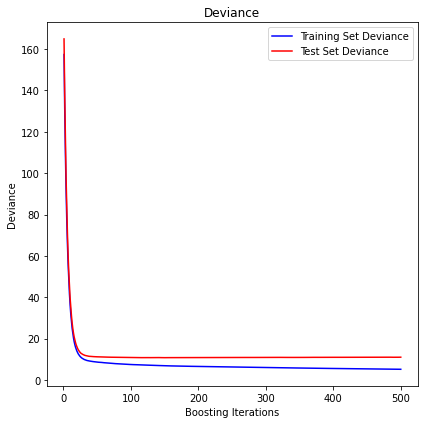

In [39]:
import numpy as np
import matplotlib.pyplot as plt

test_score = np.zeros((500,), dtype=np.float64)

for i, y_pred in enumerate(GBR.staged_predict(X_test)):
    test_score[i] = GBR.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(500) + 1,
    GBR.train_score_,
    "b-",
    label="Training Set Deviance")
plt.plot(
    np.arange(500) + 1,
    test_score,
    "r-",
    label="Test Set Deviance")
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

**Создаём финальную модель**

In [40]:
GBR_f = GradientBoostingRegressor(loss='squared_error', max_depth=3, n_estimators=500)
GBR_f.fit(X_train_num, y_train_num)

GradientBoostingRegressor(n_estimators=500)

**Предсказываем значения**

In [41]:
y_pred_test = GBR_f.predict(test_num)
y_pred_test

array([46.47667738, 62.65971334, 55.80184399, 81.59091181, 66.81512507,
       69.28727413, 58.35030745, 70.77006361, 74.91741215, 50.39755677,
       99.02532598, 91.31237777, 65.58765963, 63.34271245, 94.81910185,
       93.85861137, 55.38032847, 80.04654652, 68.77165537, 63.60935839,
       68.96765697, 78.99527698, 49.32083326, 94.27245232, 85.96086331,
       68.05005093, 42.67008806, 60.01917146, 78.27127082, 64.65173348,
       53.76178707, 66.65125675, 74.49528108, 91.95068748, 48.84166321,
       74.46045795, 76.728359  , 78.76390285, 91.16190249, 46.47477351,
       48.2853529 , 70.73677452, 69.2722212 , 72.16348124, 51.96624302,
       68.61482034, 58.88256598, 69.05162737, 58.54026435, 90.77126213,
       61.73313806, 41.45862201, 55.63450481, 53.5756538 , 69.49210333,
       39.99288148, 76.65046008, 66.65783136, 48.0047105 , 92.91176698,
       83.81500606, 75.4860774 , 52.298191  , 91.95680493, 49.25705677,
       60.55923191, 59.0233571 , 67.97699337, 65.31084367, 60.02

**Сверяем предсказанные значения с ответом**

In [42]:
answers = pd.read_csv("answers_2.csv")
answers.head()

,posttest
0,50.0
1,66.0
2,58.0
3,85.0
4,63.0


In [44]:
print("r2: ", r2(answers, y_pred_test))
print("MSE: ", mean_squared_error(answers, y_pred_test))

r2:  0.9614459014997718
MSE:  8.311794357089815


#### Достоинства

**⌘** Возможность рассматривать различные функции потерь. Это позволяет решать как задачи классификации, так и задачи регрессии. К тому же, возможность выбора произвольной функции потерь позволяет акцентировать внимание на особенностях данных в задаче.
<br>**⌘** Возможность рассмотрения любого семейства базовых алгоритмов, что дает широкиие возможности учета особенностей даннной задачи. Бустинг над решающими деревьями считается одним из наиболее эффективных вариантов бустинга. А учитывая, что решающие деревья в свою очередь тоже используют базовые алгоритмы (например, пороговые, линейные и т.п.), в результате получается огромное количество вариантов для настройки.
<br>**⌘** Благодаря достаточной простоте метода и четкому математическому обоснованию, в каждой конкретной вариации бустинга не сложно провести некоторые математические и алгоритмические оптимизации, которые заметно ускорят работу алгоритма.

#### Недостатки

**⌘** Градиентный бустинг – трудоемкий метод, и работает он достаточно медленно. Зачастую требуется построение сотен или даже тысяч базовых алгоритмов для композиции.
<br>**⌘** Без дополнительных модификаций он имеет свойство полностью подстраиваться под данные, в том числе под ошибки и выбросы в них.
<br>**⌘** Идея бустинга обычно плохо применима к построению композиции из достаточно сложных и мощных алгоритмов. Построение такой композиции занимает очень много времени, а качество существенно не увеличивается.
<br>**⌘** Результаты работы градиентного бустинга сложно интерпретируемы, особенно если в композицию входят десятки алгоритмов.

### eXtreme Gradient Boosting (XGBoost)

XGBoost — это оптимизированная библиотека градиентного бустинга, разработанная для обеспечения высокой *эффективности, гибкости и портативности*. Он реализует алгоритмы машинного обучения в рамках платформы Gradient Boosting. При этом XGBoost — это не какой-то новый уникальный алгоритм, а просто крайне эффективная реализация классического GBM с некоторыми дополнительными улучшениями.

**Системная оптимизация:**
<br>***1. Параллелизация.*** В XGBoost построение деревьев основано на параллелизации. Это возможно благодаря взаимозаменяемой природе циклов, используемых для построения базы для обучения: внешний цикл перечисляет листья деревьев, внутренний цикл вычисляет признаки. Нахождение цикла внутри другого мешает параллелизировать алгоритм, так как внешний цикл не может начать своё выполнение, если внутренний ещё не закончил свою работу. Поэтому для улучшения времени работы порядок циклов меняется: инициализация проходит при считывании данных, затем выполняется сортировка, использующая параллельные потоки. Эта замена улучшает производительность алгоритма, распределяя вычисления по потокам.
<br>***2. Отсечение ветвей дерева.*** В фреймворке GBM критерий остановки для разбиения дерева зависит от критерия отрицательной потери в точке разбиения. XGBoost использует параметр максимальной глубины max_depth вместо этого критерия и начинает обратное отсечение, то есть он находит разделения до заданной максимальной глубины, а затем начинает обрезать дерево и удалять разделения, после которых нет положительных результатов. Этот подход значительно улучшает вычислительную производительность. 
<br>***3. Аппаратная оптимизация.*** Алгоритм был разработан таким образом, чтобы он оптимально использовал аппаратные ресурсы. Это достигается путём создания внутренних буферов в каждом потоке для хранения статистики градиента. Дальнейшие улучшения, как, например, вычисления вне ядра, позволяют работать с большими наборами данных, которые не помещаются в памяти компьютера.
<br><br>**Улучшения алгоритма:**
<br>***1. Регуляризация.*** Он штрафует сложные модели, используя как регуляризацию L1, так и регуляризацию L2, для того чтобы избежать переобучения.
<br>***2. Работа с разреженными данными.*** Алгоритм упрощает работу с разреженными данными, в процессе обучения заполняя пропущенные значения в зависимости от значения функции потерь.
<br>***3. Кросс-валидация.*** Алгоритм использует свой собственный метод кросс-валидации на каждой итерации. То есть, нам не нужно отдельно программировать этот поиск и определять количество итераций бустинга для каждого запуска.

#### Гиперпараметры

Основные:
<br>**n_estimators**: число деревьев.
<br>**eta**: размер шага. Предотвращает переобучение.
<br>**gamma**: минимальное изменение значения loss функции для разделения листа на поддеревья.
<br>**max_depth**: максимальная глубина дерева.
<br>**lambda/alpha**: L2/L1 регуляризация.

Подробнее: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

#### Пример использования

##### Строим модель

**Создаём нашу модель**

In [45]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_train_num, y_train_num, test_size=0.3, random_state=1)

XGB = xgb.XGBRegressor(n_estimators=200, max_depth=3, random_state=1, reg_lambda=0.7)

**Учим модель**

In [46]:
XGB.fit(X_train, y_train)
XGB_predict = XGB.predict(X_test)

print(r2(y_test, XGB_predict))

0.9420691355806551


**Создаём финальную модель**

In [47]:
XGB_f = xgb.XGBRegressor(n_estimators=200, max_depth=3, random_state=1, reg_lambda=0.7)
XGB_f.fit(X_train_num, y_train_num)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=0.7, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

**Предсказываем значения**

In [48]:
y_pred_test = XGB_f.predict(test_num)
y_pred_test

array([46.281734, 62.782825, 54.64514 , 82.202896, 68.10658 , 69.433044,
       58.501225, 71.41305 , 75.20048 , 51.304615, 98.77448 , 91.29235 ,
       66.469124, 62.80782 , 95.27786 , 91.30527 , 55.65014 , 78.81028 ,
       68.725624, 62.62252 , 69.227   , 78.382835, 49.45116 , 93.77728 ,
       86.50311 , 68.24686 , 43.03709 , 59.784435, 78.25263 , 64.04166 ,
       54.22354 , 66.47311 , 74.511696, 92.74828 , 48.791153, 74.43759 ,
       76.539314, 78.184   , 90.54505 , 46.111626, 47.924698, 70.53032 ,
       69.16572 , 71.93129 , 51.821064, 68.789856, 59.82017 , 69.52326 ,
       58.87929 , 91.60464 , 61.438553, 41.537426, 55.821045, 54.12288 ,
       69.360405, 39.792664, 77.40532 , 66.47153 , 49.19908 , 93.02208 ,
       84.18282 , 75.03617 , 52.315784, 91.27929 , 49.16922 , 60.653034,
       59.055946, 68.51423 , 64.38348 , 59.912582, 57.030296, 41.51461 ,
       60.075718, 83.89314 , 53.05998 , 52.8754  , 53.462875, 47.210175,
       79.44333 , 76.32882 , 57.64832 , 60.89465 , 

**Сверяем предсказанные значения с ответом**

In [49]:
answers = pd.read_csv("answers_2.csv")
answers.head()

,posttest
0,50.0
1,66.0
2,58.0
3,85.0
4,63.0


In [50]:
print(r2(answers, y_pred_test))

0.9604606591357113
